In [1]:
%matplotlib inline
import os,time
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from numpy import load
import scipy.integrate as integrate
from IPython.display import display, Math

### 1.Estimate $r_s$ and $\rho_s$ ###

In [2]:
#data extract from plot. Reference Prada's paper
raw_data=np.asarray([241710902106662.06, 1.0313131313131314,
18818368905895.32, 1.082828282828283,
3196535735740.5576, 1.1282828282828283,
543042997516.4798, 1.1757575757575758,
46654368246.511154, 1.2414141414141415,
15673719113.755852, 1.2717171717171718])

even_index = np.arange(0,len(raw_data),2)
odd_index = np.arange(1,len(raw_data)+1,2)
x_data = np.sort(raw_data[even_index])
logx = np.log10(x_data)
y_data = np.sort(raw_data[odd_index])[::-1]
logx,y_data

(array([10.19517206, 10.66889231, 11.73483422, 12.50467956, 13.27458198,
        14.38329624]),
 array([1.27171717, 1.24141414, 1.17575758, 1.12828283, 1.08282828,
        1.03131313]))

In [3]:
error_raw_data = np.asarray([11339277979487.898, 1.0949494949494951,
11552088393356.969, 1.0808080808080809,
11543742487270.742, 1.0696969696969698,
6201972239258.078, 1.1181818181818184,
6319613541701.501, 1.107070707070707,
6439486307864.316, 1.095959595959596,
3809975794380.673, 1.1272727272727274,
3883010110656.9927, 1.1191919191919193,
3881224676131.749, 1.1121212121212123,
2003827867164.7502, 1.1484848484848487,
2002906493448.289, 1.1414141414141414,
2041434797562.3398, 1.1343434343434344,
1207197241317.5615, 1.1575757575757577,
1206642163794.706, 1.1505050505050507,
1206166586206.2786, 1.1444444444444446,
685963269612.3024, 1.1676767676767679,
712888719841.1057, 1.1595959595959597,
713076096734.9534, 1.1636363636363638])

x_pos_1 = np.arange(0,len(error_raw_data),6)
x_pos_2 = np.arange(0,len(error_raw_data),6)+2
x_pos_3 = np.arange(0,len(error_raw_data),6)+4
x_pos = (error_raw_data[x_pos_1]+error_raw_data[x_pos_2]+error_raw_data[x_pos_3])/3
y_pos_index = np.arange(0,len(error_raw_data),6)+3
y_pos = error_raw_data[y_pos_index]
errorbar_pos_1 = np.arange(0,len(error_raw_data),6)+1
errorbar_pos_2 = np.arange(0,len(error_raw_data),6)+3
errorbar = (error_raw_data[errorbar_pos_1]-error_raw_data[errorbar_pos_2])

In [4]:
#extrapolate the data, expect (log(x))**2 = y
poly_1 = np.polyfit(logx[:], y_data[:],deg=3)
ngc_mass = 1e9
y_fit_1 = np.polyval(poly_1,np.log10(ngc_mass))
y_fit_1

1.3357024093064997

In [5]:
#consider errorbar upper limit
y_data_upper = np.copy(y_data)
y_data_upper[-2] -=0.06
y_data_upper[-3] -=0.01
y_data_upper

poly_2 = np.polyfit(logx[:], y_data_upper,deg=2)
ngc_mass = 1e9
y_fit_2 = np.polyval(poly_2,np.log10(ngc_mass))
y_fit_2

1.3997001960043007

In [6]:
#consider errorbar upper limit
y_data_lower = np.copy(y_data)
y_data_lower[-1] +=0.02
y_data_lower[-2] +=0.01

#extrapolate the data, expect (log(x))**2 = y
poly_3 = np.polyfit(logx[:], y_data_lower,deg=2)
ngc_mass = 1e9
y_fit_3 = np.polyval(poly_3,np.log10(ngc_mass))
y_fit_3

1.3661885167771677

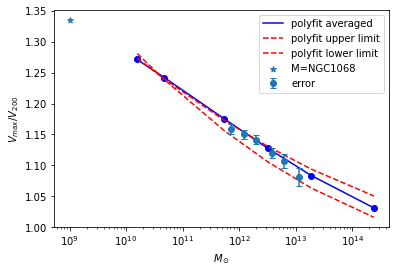

In [7]:
plt.plot(x_data,y_data,'bo')

plt.plot(x_data,np.polyval(poly_1, np.log10(x_data)),'b-',label='polyfit averaged')
plt.plot(x_data,np.polyval(poly_2, np.log10(x_data)),'r--',label='polyfit upper limit')
plt.plot(x_data,np.polyval(poly_3, np.log10(x_data)),'r--',label='polyfit lower limit')
#plt.fill_between(x_data, np.polyval(poly_2, np.log10(x_data)), np.polyval(poly_3, np.log10(x_data)),alpha=0.5)

plt.xscale('log')
plt.xlabel(r'$M_\odot$')
plt.ylabel(r'$V_{max}/V_{200}$')
plt.scatter(ngc_mass,y_fit_1,marker='*',label=('M=NGC1068'))
plt.errorbar(x_pos,y_pos,yerr=errorbar,ls='none',fmt='o', capsize=3,label="error")
plt.legend()

In [8]:
#above conclusion
V_ratio = [1.36,1.39]

In [9]:
from scipy.optimize import fsolve
def func(x):
    return (0.216*x/(np.log(1+x)-x/(1+x)))**0.5-V_ratio[1]
root = fsolve(func, 13)
print(root)
np.isclose(func(root), 0)  # func(root) should be almost 0.0.

[17.75257294]


array([ True])

In [10]:
#take NGC1068 morpholohy data from NED database
M_200 = 0.9e9
R_200 = [14.91,27.7] #for gamma>2.5 and gamma =1

c = np.asarray([16.38,17.75])
r_s = R_200[0]/c
gamma = 1

In [11]:
int_NFW = integrate.quad(lambda x: x**2/( (x/0.91) * (1+x/0.91)**2 ), 0, 14.91)
rho_s = M_200/int_NFW[0]
display(Math(r'$\rho_s={} M_\odot/kpc^3$'.format(str(rho_s))))
#galaxy 4e7
rho_s_GeV = 0.181*rho_s/4e7 #unit GeV/cm^3

<IPython.core.display.Math object>

### 2.load MadDM and Pythia dN/dE spectrum data ###

In [12]:
#list out all parameters and data, some parameter are calculated in different script

#dm properties. Reference: Carlos' paper
dm_mass = [1e3,1e4] # unit GeV
sigma_v_1TeV = 9e-24 #above were excluded, unit cm^3/s
sigma_v_10TeV = 2e-23 #above were excluded

#spectrum propagation
J_NGCplane = 7.959683361904154e+22 #average J for NGC1068 galaxy plane unit GeV^2/cm^5
G = 0.99 #attenuation of neutrino
cosmo_scale = J_NGCplane*G

#particle properties
sigmav = sigma_v_10TeV
m_chi = dm_mass[1]

#cosmology properties
rho_D = rho_s
D = r_s[0]   #here convert to cm
D_cm = r_s[0]*3.08e21
gamma = 1
gamma_sp = 2.5
R_spike = 0.1
R_core = 1
R_s=0.2
R_in = 1.5*np.sqrt((20*R_s)**2+R_core**2)


#eq16
spike_scale = (rho_s_GeV**2 * sigma_v_10TeV *D_cm /2/m_chi**2) * ((R_spike/D)**(3-2*gamma))* ((R_spike/R_in)**(2*gamma_sp-3))
print(spike_scale)

#diffuse
plane_scale=J_NGCplane*sigma_v_10TeV/2/m_chi**2
print(plane_scale)

6.425608182609789e-14
7.959683361904154e-09


### 3.J-factor, G-factor and Flux according to eq.(16) ###

In [13]:
#spectrum generate by charon,unit of the axis is x=E/M, convert unit to E
x = load('../data/energy_grid.npy')*dm_mass[1]
y = load('../data/channel_bb_mass_10000.0_Halo_init.npy')
y1 = y['nu_mu']+y['nu_mu_bar']/dm_mass[1]
plt.plot(x, x**2 * y1,'b.',label='bb channel, dm mass=10TeV')
plt.xlim([1e3,1e4])
plt.yscale('log')
plt.xlabel(r"$E [GeV]$")
plt.ylabel(r"$E2 dN/dE$")
plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: '../data/energy_grid.npy'

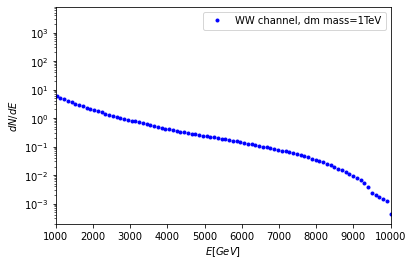

In [ ]:
#spectrum generate by charon
x = load('../data/energy_grid.npy')*dm_mass[1]
y = load('../data/channel_tautau_mass_10000.0_Halo_init.npy')
y2 = y['nu_mu']+y['nu_mu_bar']/dm_mass[1]
plt.plot(x, x**2 * y2,'b.',label='WW channel, dm mass=1TeV')
plt.xlim([1e3,1e4])
plt.yscale('log')
plt.xlabel(r"$E [GeV]$")
plt.ylabel(r"$E^2 dN/dE$")
plt.legend()

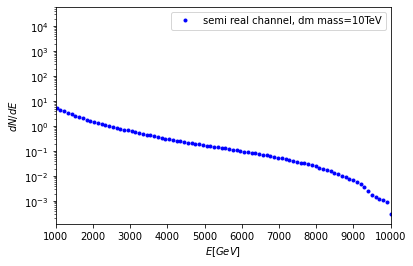

In [ ]:
y3=(0.3*y1+0.7*y2) #combine most hard and most soft channel
plt.plot(x,x**2 *y3,'b.',label='semi real channel, dm mass=10TeV')
plt.xlim([1e3,1e4])
plt.yscale('log')
plt.xlabel(r"$E [GeV]$")
plt.ylabel(r"$E^2 dN/dE$")
plt.legend()

### 4.NGC1068 point source search fit power spectrum ###

In [ ]:
x = load('../data/energy_grid.npy')
x_true = x*dm_mass[1]

In [ ]:
gamma = 3.2 #+-0.2
Phi_0 = 5e-14 #+-1.5stat,+-0.6sys, unit TeV^-1cm^-2s^-1,only muon nu, at 1TeV, e-11 for TeV^-1 unit, e-14 for GeV-1 unit
E_0 = 1000 #GeV
L_nu = 2.9e42 #+-1.1,unit ergs^-1, 1.5TeV to 15TeV
n_hat = 79 #+22-20 events

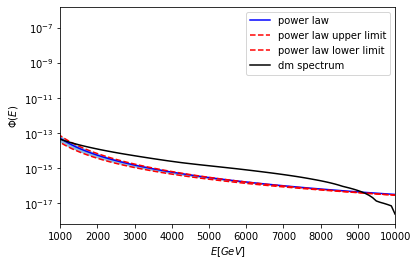

In [ ]:
scale_factor=1000000
Phi_dm = y3*plane_scale/scale_factor

Phi_E_no_error = Phi_0 * (x_true/E_0)**(-gamma)
Phi_E_upper = (Phi_0+1.5e-14+0.6e-14) * (x_true/E_0)**(-gamma-0.2)
Phi_E_lower = (Phi_0-1.5e-14-0.6e-14) * (x_true/E_0)**(-gamma+0.2)

plt.plot(x_true,x_true**2 * Phi_E_no_error,'b-',label='power law')
plt.plot(x_true,x_true**2 * Phi_E_upper,'r--',label='power law upper limit')
plt.plot(x_true,x_true**2 * Phi_E_lower,'r--',label='power law lower limit')
plt.fill_between(x_true, x_true**2 * Phi_E_lower, Phi_E_upper,alpha=0.5)
plt.plot(x_true,Phi_dm,'k-',label='dm spectrum')

plt.yscale('log')
plt.xlabel(r"$E [GeV]$")
plt.xlim([1e3,1e4])
#plt.ylim([1e-18,1e-13])
plt.ylabel(r"$E^2 d\Phi(E)/dE$")
plt.legend()
plt.show()

### conclusion ###